In [1]:
############################## BASELINE - OVERFIT ##############################
#Note: Commented out code pieces are only needed in full dataset training 

import torch
import torch.optim as optim

import torchtext
from torchtext import data
import spacy

import argparse
import os


from models import *

import torch.nn as nn
from torch.autograd import Variable
import time

import matplotlib.pyplot as plt

#Hyperparameters 
learning_rate = 0.001
batch_size = 1
epochs = 400
seed = 0

torch.manual_seed(seed)

In [2]:
#Accuracy Function 
def accuracy(predictions, labels):
    totalCor = 0
    ind = 0
    
    for c in predictions:
        if (c.item()>0.5):
            r = 1.0
        else:
            r = 0.0
        
        if (r== labels[ind].item()):
            totalCor += 1
        ind += 1
    
    return (totalCor/len(labels))

Shape of Vocab: torch.Size([643, 100])
avg acc/epoch 0.5
[1,    50] avg loss/epoch: 0.709
avg acc/epoch 0.5
[2,    50] avg loss/epoch: 0.695
avg acc/epoch 0.5
[3,    50] avg loss/epoch: 0.686
avg acc/epoch 0.5
[4,    50] avg loss/epoch: 0.672
avg acc/epoch 0.5
[5,    50] avg loss/epoch: 0.663
avg acc/epoch 0.5
[6,    50] avg loss/epoch: 0.654
avg acc/epoch 0.5
[7,    50] avg loss/epoch: 0.652
avg acc/epoch 0.5
[8,    50] avg loss/epoch: 0.636
avg acc/epoch 0.5
[9,    50] avg loss/epoch: 0.628
avg acc/epoch 0.5
[10,    50] avg loss/epoch: 0.620
avg acc/epoch 0.5
[11,    50] avg loss/epoch: 0.615
avg acc/epoch 0.5
[12,    50] avg loss/epoch: 0.606
avg acc/epoch 0.52
[13,    50] avg loss/epoch: 0.599
avg acc/epoch 0.5
[14,    50] avg loss/epoch: 0.590
avg acc/epoch 0.52
[15,    50] avg loss/epoch: 0.585
avg acc/epoch 0.54
[16,    50] avg loss/epoch: 0.576
avg acc/epoch 0.54
[17,    50] avg loss/epoch: 0.571
avg acc/epoch 0.54
[18,    50] avg loss/epoch: 0.565
avg acc/epoch 0.52
[19,    50

avg acc/epoch 0.94
[164,    50] avg loss/epoch: 0.232
avg acc/epoch 0.94
[165,    50] avg loss/epoch: 0.231
avg acc/epoch 0.92
[166,    50] avg loss/epoch: 0.230
avg acc/epoch 0.92
[167,    50] avg loss/epoch: 0.230
avg acc/epoch 0.92
[168,    50] avg loss/epoch: 0.228
avg acc/epoch 0.92
[169,    50] avg loss/epoch: 0.227
avg acc/epoch 0.92
[170,    50] avg loss/epoch: 0.227
avg acc/epoch 0.92
[171,    50] avg loss/epoch: 0.225
avg acc/epoch 0.92
[172,    50] avg loss/epoch: 0.228
avg acc/epoch 0.92
[173,    50] avg loss/epoch: 0.224
avg acc/epoch 0.94
[174,    50] avg loss/epoch: 0.224
avg acc/epoch 0.92
[175,    50] avg loss/epoch: 0.223
avg acc/epoch 0.94
[176,    50] avg loss/epoch: 0.222
avg acc/epoch 0.94
[177,    50] avg loss/epoch: 0.220
avg acc/epoch 0.92
[178,    50] avg loss/epoch: 0.219
avg acc/epoch 0.92
[179,    50] avg loss/epoch: 0.218
avg acc/epoch 0.94
[180,    50] avg loss/epoch: 0.218
avg acc/epoch 0.94
[181,    50] avg loss/epoch: 0.217
avg acc/epoch 0.94
[182,    

avg acc/epoch 1.0
[326,    50] avg loss/epoch: 0.128
avg acc/epoch 1.0
[327,    50] avg loss/epoch: 0.128
avg acc/epoch 1.0
[328,    50] avg loss/epoch: 0.127
avg acc/epoch 1.0
[329,    50] avg loss/epoch: 0.127
avg acc/epoch 1.0
[330,    50] avg loss/epoch: 0.126
avg acc/epoch 1.0
[331,    50] avg loss/epoch: 0.125
avg acc/epoch 1.0
[332,    50] avg loss/epoch: 0.125
avg acc/epoch 1.0
[333,    50] avg loss/epoch: 0.124
avg acc/epoch 1.0
[334,    50] avg loss/epoch: 0.124
avg acc/epoch 1.0
[335,    50] avg loss/epoch: 0.124
avg acc/epoch 1.0
[336,    50] avg loss/epoch: 0.124
avg acc/epoch 1.0
[337,    50] avg loss/epoch: 0.123
avg acc/epoch 1.0
[338,    50] avg loss/epoch: 0.123
avg acc/epoch 1.0
[339,    50] avg loss/epoch: 0.122
avg acc/epoch 1.0
[340,    50] avg loss/epoch: 0.122
avg acc/epoch 1.0
[341,    50] avg loss/epoch: 0.122
avg acc/epoch 1.0
[342,    50] avg loss/epoch: 0.121
avg acc/epoch 1.0
[343,    50] avg loss/epoch: 0.121
avg acc/epoch 1.0
[344,    50] avg loss/epoch:

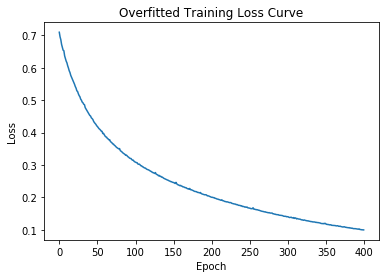

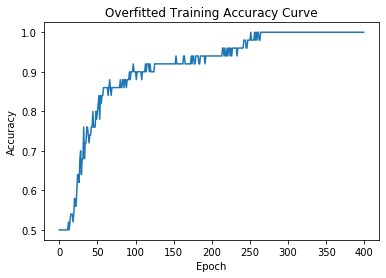

In [3]:
def main():
    # Instantiates 2 data.Field objects 
    TEXT = data.Field(sequential=True,lower=True, tokenize='spacy', include_lengths=True)
    LABELS = data.Field(sequential=False, use_vocab=False)

    # Load the overfit data
    train_data = data.TabularDataset(
            path='data/overfit.tsv', format='tsv',
            skip_header=True, fields=[('text', TEXT), ('label', LABELS)])

    # Create an object that can be enumerated (for training loop later)
    train_iter = data.BucketIterator(
      train_data, batch_size=batch_size,
    sort_key=lambda x: len(x.text), device=None, sort_within_batch=True, repeat=False)
    
    # Vocab object contains the index/token for each unique word in the dataset (looks through all sentences in dataset)
    TEXT.build_vocab(train_data)

    # Loading GloVe Vector and Using Embedding Layer
    TEXT.vocab.load_vectors(torchtext.vocab.GloVe(name='6B', dim=100))
    vocab = TEXT.vocab

    print("Shape of Vocab:",TEXT.vocab.vectors.shape) #number of unique words in "overfit" data
    
    # Training the model ----------------------------------------------------------------
    # Reproducability 
    torch.manual_seed(seed)

    # Initiate model 
    model = Baseline(100,vocab) # (embedding_size, vocab)
    
    # Define loss and optimzer functions 
    loss_fnc = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)


    # Store for plotting
    loss_list = []
    acc_list = []
    nepoch = []

    #val_acc_list = []
    #val_loss_list = []

    # TRAINING LOOP ----------------------------------------------------------------
    for e in range(epochs): 
        nepoch = nepoch + [e]

        batchloss_accum = 0.0
        batchacc_accum = 0.0
        #model.train() 

        for i, batch in enumerate(train_iter, 0):
            correct = 0 
            total = 0 

            # Zero parameter gradients
            optimizer.zero_grad()
            
            batch_input, batch_input_length = batch.text
            
            # Run model on inputs
            outputs = model(batch_input) #batch has size [sentence length, batch size]
            #print(outputs.shape)
            #print(batch.label.float().shape)
            
            # Compute loss
            batchloss = loss_fnc(outputs, batch.label.float()) #(batch.label) (tensor of 64 1s and 0s)
            batchloss_accum = batchloss_accum + batchloss.item() #added values of loss for all batches
            #print('batchloss',batchloss)
            
            batchloss.backward() 
            optimizer.step()
            
            # Compute accuracy 
            batchacc = accuracy(outputs,batch.label.float())
            batchacc_accum = batchacc_accum + batchacc
            #print("Batch accuracy",batchacc)

            if i == len(train_iter)-1: 
                #model.eval()
                #vacc, vloss = evaluate(model,val_iter)
                
                print("avg acc/epoch", batchacc_accum/len(train_iter))
                print('[%d, %5d] avg loss/epoch: %.3f' % (e + 1, i + 1, batchloss_accum/len(train_iter)))
                
                #print("validation loss:", vloss)
                #print("validation acc:", vacc)

                loss_list = loss_list + [batchloss_accum/len(train_iter)]
                acc_list = acc_list + [batchacc_accum/len(train_iter)]
                
                #val_acc_list.append(vacc)   
                #val_loss_list.append(vloss)

                batchloss_accum = 0.0
                batchacc_accum = 0.0 
    # TRAIN LOSS 
    plt.plot(nepoch,loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss") 
    plt.title("Overfitted Training Loss Curve")
    plt.show() 

    # TRAIN ACC
    plt.plot(nepoch,acc_list)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy") 
    plt.title("Overfitted Training Accuracy Curve")
    plt.show()   
    
    

if __name__ == '__main__':
    main()

